In [1]:
from sklearn import feature_extraction

In [2]:
# делаем такой векторизатор, который будет векторизовать тексты, вычеркивая стоп слова - делать tf
# не включаю в стоп-список предлоги, потому что они могут иметь какой-то вес
f = feature_extraction.text.CountVectorizer(stop_words = ['и', 'а', 'я', 'как', 'если', 'всегда', 'что', 'не', 'это'])
type(f)

sklearn.feature_extraction.text.CountVectorizer

In [3]:
import pandas as pd

In [4]:
# читаем таблицу из файла
sent_lf_list_df = pd.read_csv("lf_corpus_lemmas.csv", encoding="utf-8", sep=",") # есть другие аргументы: sep, decimal и др.

In [5]:
sent_lf_list_df

,Unnamed: 0,phrase,lf-label
0,0,В КРЕМЛЬ И В БЕЛЫЙ ДОМ НА ПРОШЛЫЙ НЕДЕЛЯ ОБОС...,LF
1,1,ЭКОНОМИЧЕСКИЙ СОВЕТНИК ПРЕЗИДЕНТ ПУТИН АКАДЕМ...,LF
2,2,ГЛАЗЬЕВ В ЧАСТНОСТИ КРИТИКОВАТЬ ДЕНЕЖНЫЙ КРЕД...,notLF
3,3,ИМЕННО ЭТОТ МЕХАНИЗМ ЛИШАТЬ СТРАНА ИНВЕСТИЦИЯ...,notLF
4,4,В 60-СТРАНИЧНЫЙ ДОКЛАД АКАДЕМИК ГЛАЗЬЕВ НЕ ПР...,notLF
...,...,...,...
214253,214253,СЛИШКОМ МНОГО ЗА ПОСЛЕДНИЙ ГОД СТАНОВИТЬСЯ ГО...,notLF
214254,214254,А СКОЛЬКО ЧЕЛОВЕК ЧАС СИДЕТЬ В ОСТАНАВЛИВАТЬС...,LF
214255,214255,ВОЛНА СУДЕБНЫЙ ИСК ПРОСТО СМЫВАТЬ БЫ И ГОСПОД...,notLF
214256,214256,ПОКА ЖЕ У ЭНЕРГОПЫЛЕСОС ЕЖЕГОДНО ВЫКАЧИВАТЬ И...,notLF


In [6]:
X = f.fit_transform(sent_lf_list_df["phrase"])

In [7]:
print(f.get_feature_names_out()[10000:10020]) # посмотрим на признаки,  например на 20 из них 

['выдача' 'выдающийся' 'выдвигать' 'выдвигаться' 'выдвиженец' 'выдвижение'
 'выдвижной' 'выдворять' 'выдел' 'выделение' 'выделять' 'выделяться'
 'выдергивать' 'выдерживать' 'выдержка' 'выдирать' 'выдомский' 'выдох'
 'выдра' 'выдувать']


In [8]:
#что здесь происходит не то? если брать весь корпус
# display(X.shape)
#display(X.toarray())

In [9]:
display(X.shape)

(214258, 54433)

In [10]:
sent_lf_list_df["lf-label"]=sent_lf_list_df["lf-label"].map({'LF':1,'notLF':0}) # в первой колонке переименуем значения 'spam' в 1  и 'ham' в 0
sent_lf_list_df

,Unnamed: 0,phrase,lf-label
0,0,В КРЕМЛЬ И В БЕЛЫЙ ДОМ НА ПРОШЛЫЙ НЕДЕЛЯ ОБОС...,1
1,1,ЭКОНОМИЧЕСКИЙ СОВЕТНИК ПРЕЗИДЕНТ ПУТИН АКАДЕМ...,1
2,2,ГЛАЗЬЕВ В ЧАСТНОСТИ КРИТИКОВАТЬ ДЕНЕЖНЫЙ КРЕД...,0
3,3,ИМЕННО ЭТОТ МЕХАНИЗМ ЛИШАТЬ СТРАНА ИНВЕСТИЦИЯ...,0
4,4,В 60-СТРАНИЧНЫЙ ДОКЛАД АКАДЕМИК ГЛАЗЬЕВ НЕ ПР...,0
...,...,...,...
214253,214253,СЛИШКОМ МНОГО ЗА ПОСЛЕДНИЙ ГОД СТАНОВИТЬСЯ ГО...,0
214254,214254,А СКОЛЬКО ЧЕЛОВЕК ЧАС СИДЕТЬ В ОСТАНАВЛИВАТЬС...,1
214255,214255,ВОЛНА СУДЕБНЫЙ ИСК ПРОСТО СМЫВАТЬ БЫ И ГОСПОД...,0
214256,214256,ПОКА ЖЕ У ЭНЕРГОПЫЛЕСОС ЕЖЕГОДНО ВЫКАЧИВАТЬ И...,0


In [11]:
from sklearn import model_selection

In [12]:
# новые переменные
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, sent_lf_list_df['lf-label'], test_size=0.2, random_state=50)
print(X_train.shape, X_test.shape)

(171406, 54433) (42852, 54433)


In [13]:
#Смотрим, как распределены lf и не lf в тестовом и тренировочном кусочке
print('В тренировочном кусочке lf набралось ', sum(y_train == 1))
print('В тренировочном кусочке не lf набралось ', sum(y_train == 0))
print(sum(y_train))
print('В тестовом кусочке lf набралось ', sum(y_test == 1))
print('В тестовом кусочке не lf набралось ', sum(y_test == 0))
print(sum(y_test))

В тренировочном кусочке lf набралось  49953
В тренировочном кусочке не lf набралось  121453
49953
В тестовом кусочке lf набралось  12365
В тестовом кусочке не lf набралось  30487
12365


In [14]:
# еще раз сравниваю кусочки, уже на картинке
import matplotlib.pyplot as plt

0    121453
1     49953
Name: lf-label, dtype: int64


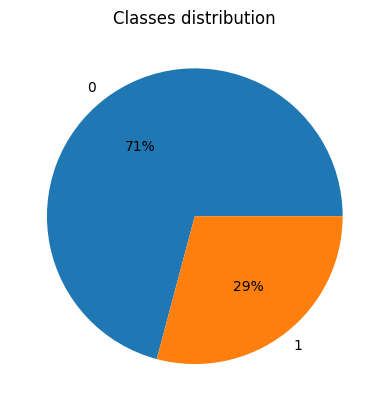

In [15]:
classes = pd.value_counts(y_train)

print(classes)

classes.plot(kind = 'pie',  autopct='%0.f%%') 
# про string formatting https://realpython.com/python-string-formatting/

plt.title("Classes distribution")

plt.ylabel('')

plt.show()

0    30487
1    12365
Name: lf-label, dtype: int64


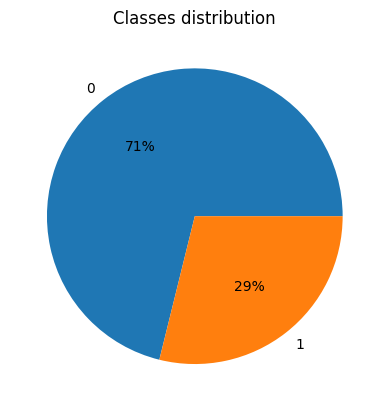

In [16]:
classes = pd.value_counts(y_test)

print(classes)

classes.plot(kind = 'pie',  autopct='%0.f%%') 
# про string formatting https://realpython.com/python-string-formatting/

plt.title("Classes distribution")

plt.ylabel('')

plt.show()

In [17]:
# количество всех строк, как lf, так и не lf
print(y_train.shape, y_test.shape) # размерности таргета (y)

(171406,) (42852,)


In [18]:
import numpy as np

In [19]:
list_alpha = np.arange(1/100000, 20, 0.11) 
#возьмем лист равномерно распределенных значений от 1/100000 до 20
#можно выбрать другие числа,эти были выбраны экспериментально
print(len(list_alpha))

182


In [20]:
score_train = np.zeros(len(list_alpha)) # accuracy on train set
score_test = np.zeros(len(list_alpha)) #accuracy on test set
recall_test = np.zeros(len(list_alpha)) # recall on test
precision_test= np.zeros(len(list_alpha)) # precision on test

In [21]:
from sklearn import naive_bayes, metrics

In [22]:
count = 0 
for alpha in list_alpha: # для каждого значения в списке альф
    bayes = naive_bayes.MultinomialNB(alpha=alpha) # вызываем модель
    bayes.fit(X_train, y_train) # тренируем модель
    
    score_train[count] = bayes.score(X_train, y_train) # итерируемся по индексу в листе, добавляем значения accuracy on train

    score_test[count]= bayes.score(X_test, y_test) # то же самое,но для accuracy на тестовой выборке
 
    # а теперь для precision и recall
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))

    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    
    count = count + 1 # после одной итерации, делаем новый шаг,  чтобы пройтись по всем alpha

In [23]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])

models = pd.DataFrame(data = matrix,
                      columns = ['alpha',
                                 'Train Accuracy',
                                 'Test Accuracy',
                                 'Test Recall',
                                 'Test Precision'])
display(models.head(10))

display(matrix.shape)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.839825,0.797559,0.637849,0.652681
1,0.11001,0.833576,0.790815,0.622240,0.641862
2,0.22001,0.830187,0.788225,0.615528,0.637865
3,0.33001,0.827672,0.785494,0.609462,0.633331
4,0.44001,0.825216,0.783977,0.603720,0.631450
5,0.55001,0.823478,0.782764,0.598949,0.629976
6,0.66001,0.821943,0.781667,0.594420,0.628689
7,0.77001,0.820537,0.781317,0.591185,0.628763
8,0.88001,0.819050,0.780314,0.586656,0.627672
9,0.99001,0.817719,0.779334,0.582531,0.626511


(182, 5)

In [24]:
# какие модели лучше всех по каждому параметру?
best_recall_index = models['Test Recall'].idxmax()
display(models.iloc[best_recall_index])

best_precision_index = models['Test Precision'].idxmax()
display(models.iloc[best_precision_index])

best_accuracy_index = models['Test Accuracy'].idxmax()
display(models.iloc[best_accuracy_index])

alpha             0.000010
Train Accuracy    0.839825
Test Accuracy     0.797559
Test Recall       0.637849
Test Precision    0.652681
Name: 0, dtype: float64

alpha             19.360010
Train Accuracy     0.753918
Test Accuracy      0.749183
Test Recall        0.206793
Test Precision     0.731198
Name: 176, dtype: float64

alpha             0.000010
Train Accuracy    0.839825
Test Accuracy     0.797559
Test Recall       0.637849
Test Precision    0.652681
Name: 0, dtype: float64

In [ ]:
# самый высокий показатель precision дает отстойный recall. Кажется, что для текущей задачи recall важнее, чем Precision


In [25]:
# что
models[models['Test Recall']>0.6].sort_values(by="Test Precision", ascending = False)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.839825,0.797559,0.637849,0.652681
1,0.11001,0.833576,0.790815,0.622240,0.641862
2,0.22001,0.830187,0.788225,0.615528,0.637865
3,0.33001,0.827672,0.785494,0.609462,0.633331
4,0.44001,0.825216,0.783977,0.603720,0.631450


In [37]:
# выбрана модель, которая показалась лучше по совокупности метрик, чтобы посмотреть результаты 
bayes = naive_bayes.MultinomialNB(alpha=0.00001) # вызываем модель
bayes.fit(X_train, y_train) # тренируем модель

MultinomialNB(alpha=1e-05)

In [38]:
y_pred_train = bayes.predict(X_train)
y_pred_test = bayes.predict(X_test) # предсказания модели здесь
new_df = pd.DataFrame(data = y_test)
new_df["predicted"]=bayes.predict(X_test) # добавляем новую колонку с предсказаниями

In [39]:
# матрица ошибок
m_confusion_test = metrics.confusion_matrix(y_test, y_pred_test)
pd.DataFrame(data = m_confusion_test, columns = ['Predicted not-LF', 'Predicted LF'],
            index = ['Actual not-LF', 'Actual LF'])

,Predicted not-LF,Predicted LF
Actual not-LF,26290,4197
Actual LF,4478,7887


In [40]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86     30487
           1       0.65      0.64      0.65     12365

    accuracy                           0.80     42852
   macro avg       0.75      0.75      0.75     42852
weighted avg       0.80      0.80      0.80     42852

